In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [18]:
# Importing the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/customer churn modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1.0,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0.0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1.0,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0.0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1.0,1,79084.10,0


In [19]:
# Understanding the dataset and the number of unique values in each column
print(dataset.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [5]:
# Check the number of missing values in each column
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             3
Balance            0
NumOfProducts      0
HasCrCard          6
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

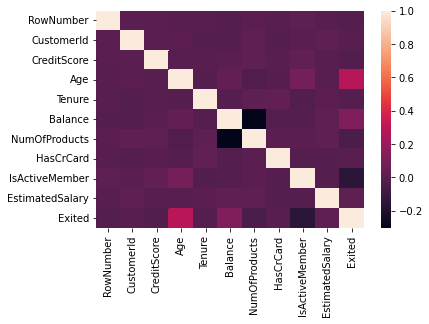

In [20]:
sns.heatmap(dataset.corr())

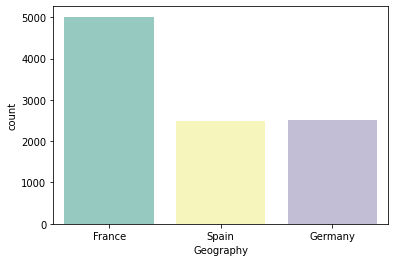

In [21]:
sns.countplot(x='Geography', data=dataset, palette = 'Set3')

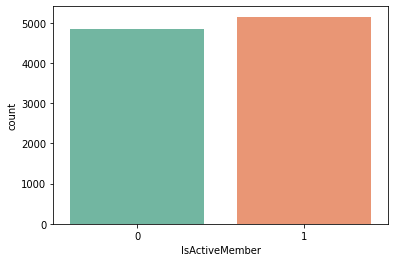

In [12]:
sns.countplot(x='IsActiveMember', data=dataset, palette = 'Set2')

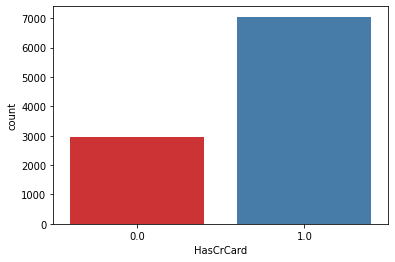

In [15]:
sns.countplot(x='HasCrCard', data=dataset, palette = 'Set1')

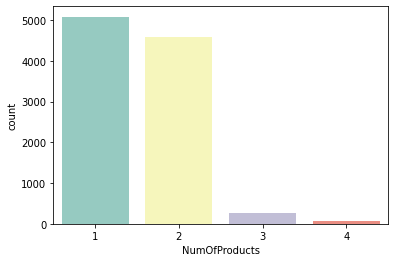

In [16]:
sns.countplot(x='NumOfProducts', data=dataset, palette = 'Set3')

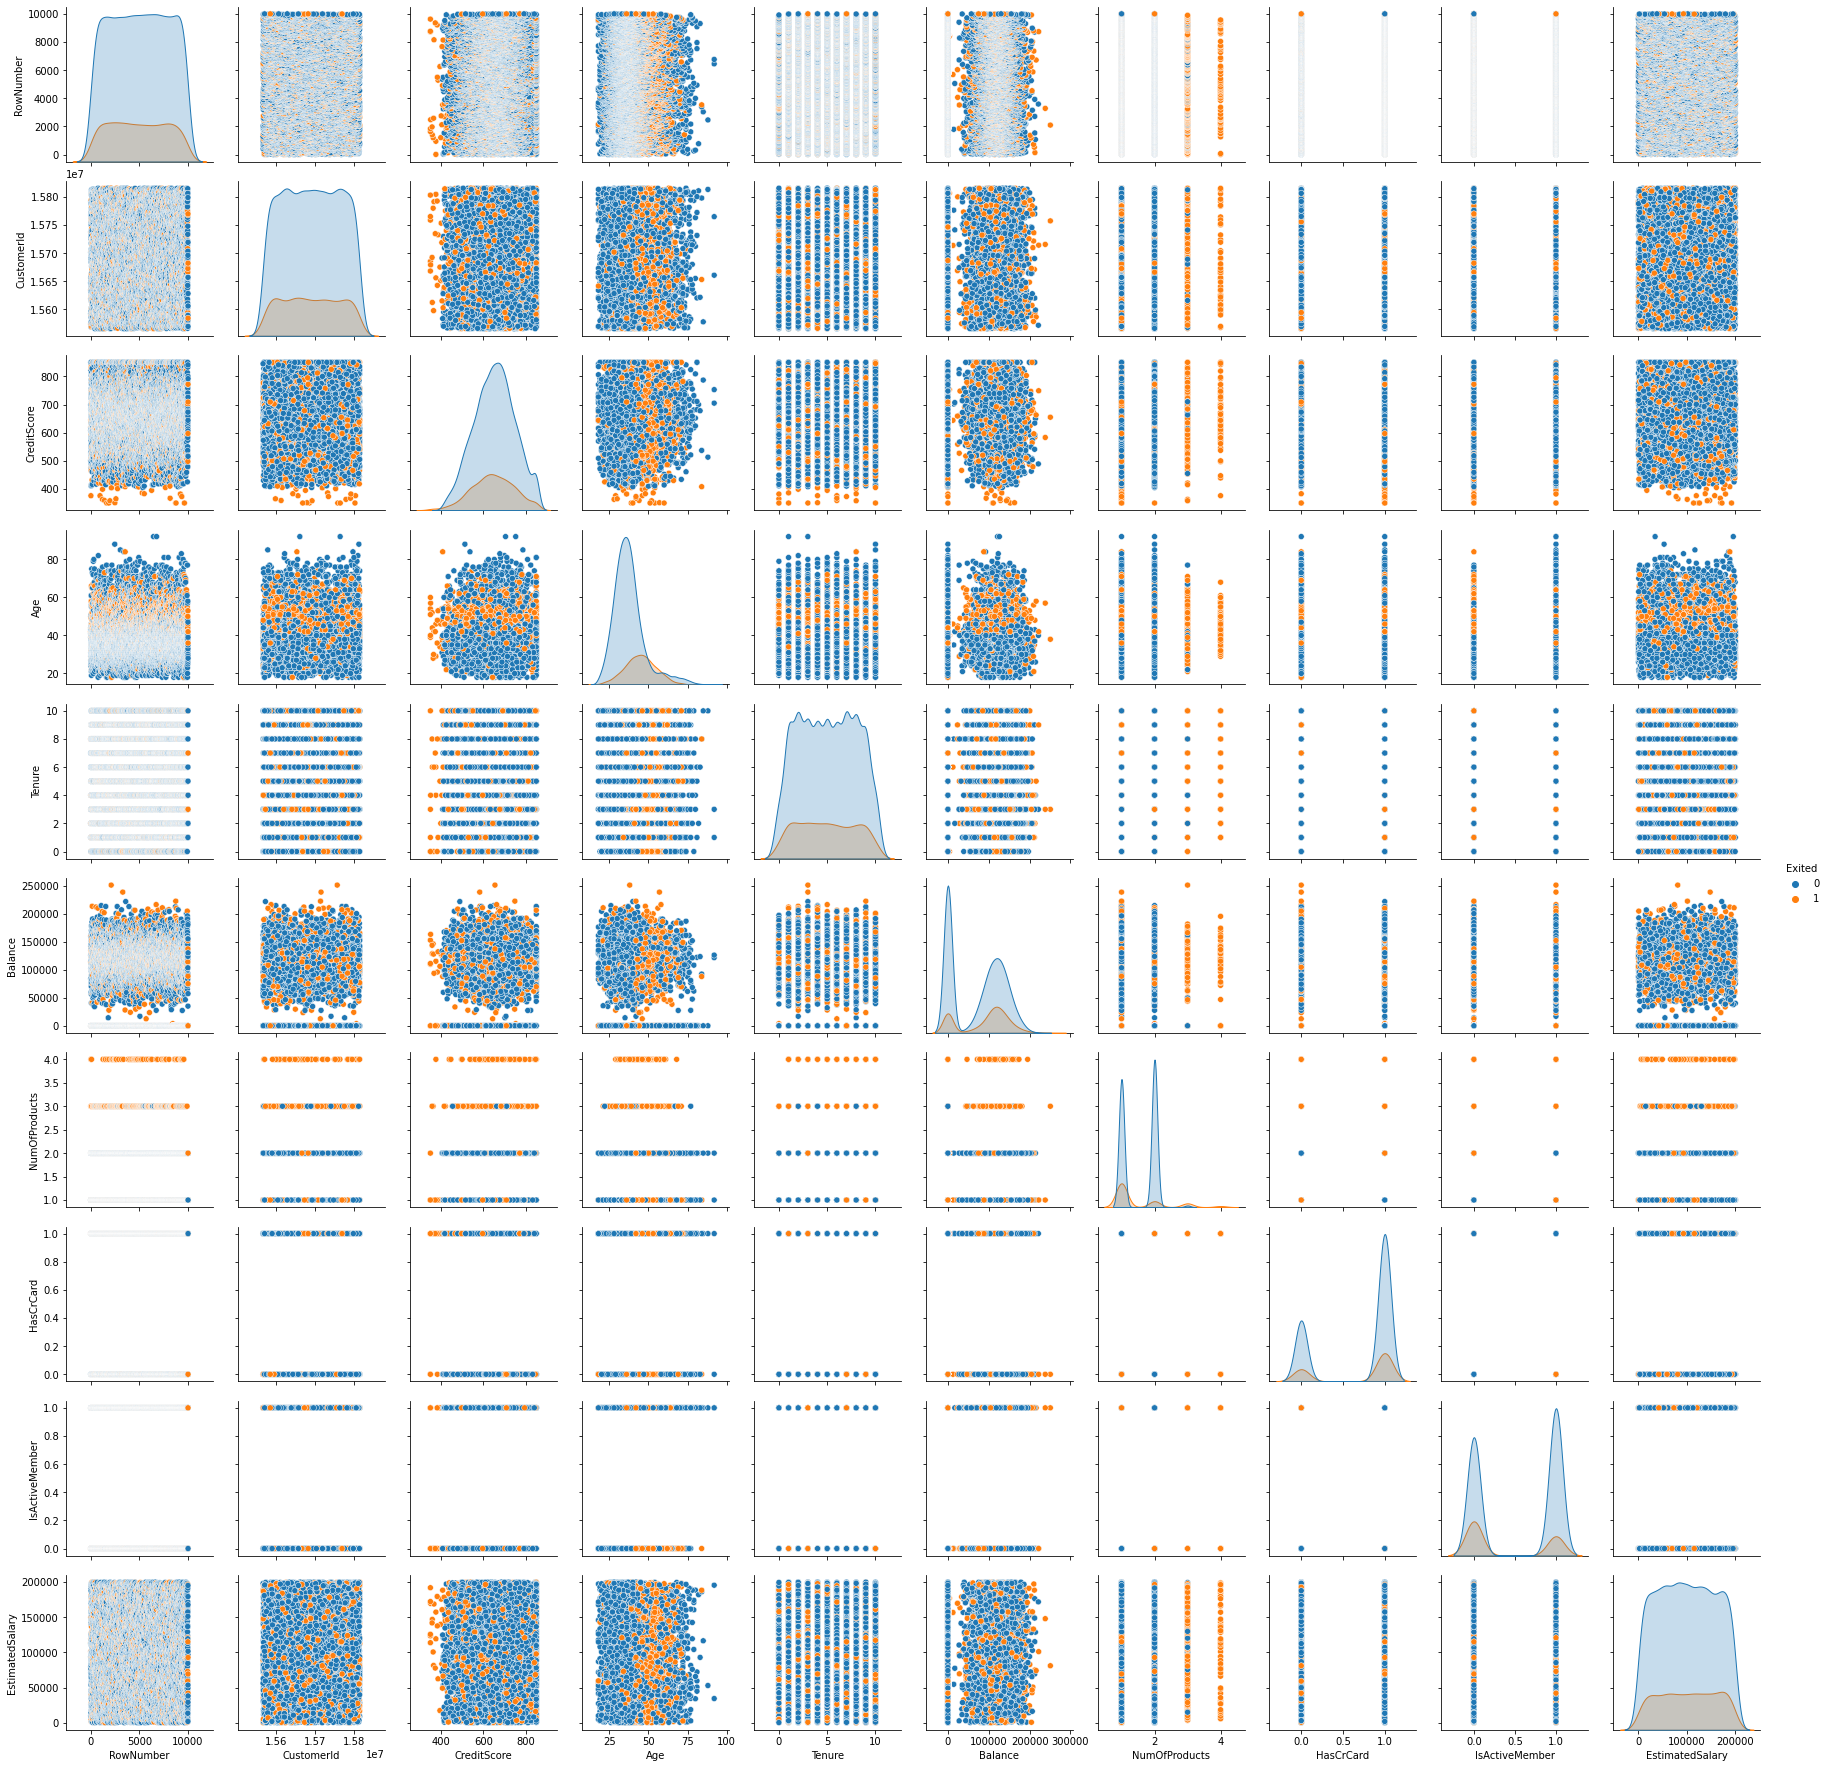

In [9]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dataset, hue = 'Exited')

In [22]:

X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values

In [23]:
# Handling of missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imputer = imputer.fit(X[:,3:10])
X[:,3:10] = imputer.transform(X[:,3:10])

In [24]:
#One-hot encoding categorical attribute 'Geography' and label encoding 'Gender' 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]
print(X)


[[0.0 0.0 619 ... 1.0 1.0 101348.88]
 [0.0 1.0 608 ... 0.0 1.0 112542.58]
 [0.0 0.0 502 ... 1.0 0.0 113931.57]
 ...
 [0.0 0.0 709 ... 0.0 1.0 42085.58]
 [1.0 0.0 772 ... 1.0 0.0 92888.52]
 [0.0 0.0 792 ... 1.0 0.0 38190.78]]


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4892 - accuracy: 0.7961
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8099
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8339
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8522
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.8580
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8608
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8591
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8602
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3453 - accuracy: 0.8604
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3441 - accura

In [29]:
# Making the predictions and evaluating the model

# Predicting the Test and Train set results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)
Y_train_pred = classifier.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)


In [30]:
#Making the confusion matrix for test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[1528   67]
 [ 199  206]]


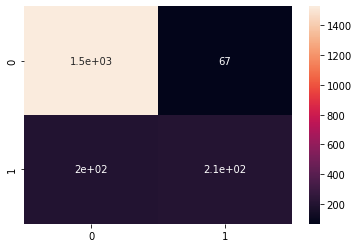

In [31]:
# Visualizing the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
#Performance metrics for both the training and testing data

# Accuracy 
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
print('Accuracy on Training data is %f' % training_data_accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy on Test data is %f' % accuracy)

#Precision
from sklearn.metrics import precision_score
training_data_precision = precision_score(Y_train_pred, Y_train)
print('Precision on Training data is %f' % training_data_precision)
precision = precision_score(Y_test, Y_pred)
print('Precision on Test data is %f' % precision)
 
# Recall
from sklearn.metrics import recall_score
training_data_recall = recall_score(Y_train_pred, Y_train)
print('Recall on Training data is %f' % training_data_recall)
recall = recall_score(Y_test, Y_pred)
print('Recall on Test data is %f' % recall)

Accuracy on Training data is 0.865000
Accuracy on Test data is 0.867000
Precision on Training data is 0.458333
Precision on Test data is 0.754579
Recall on Training data is 0.792373
Recall on Test data is 0.508642
